In [56]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [57]:
df = pd.read_csv("C:\\Users\\91986\\OneDrive\\Desktop\\UIUC\\Study material\\Spring - Data Visualization\\Glassdoor Gender Pay Gap 1.csv")
df


,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [58]:
# Check for missing values and drop rows with missing values (if any)
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

# Ensure data types are correct (convert columns if necessary)
# For example, if 'Age' should be an integer, ensure it's correctly typed
df['Age'] = df['Age'].astype(int)

# Handle outliers (example: remove rows with BasePay or Bonus beyond a reasonable range)
df = df[(df['BasePay'] > 0) & (df['Bonus'] > 0)]

# Standardize column names (optional, e.g., make all lowercase)
df.columns = df.columns.str.lower()

# Display the cleaned dataset
df

,jobtitle,gender,age,perfeval,education,dept,seniority,basepay,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


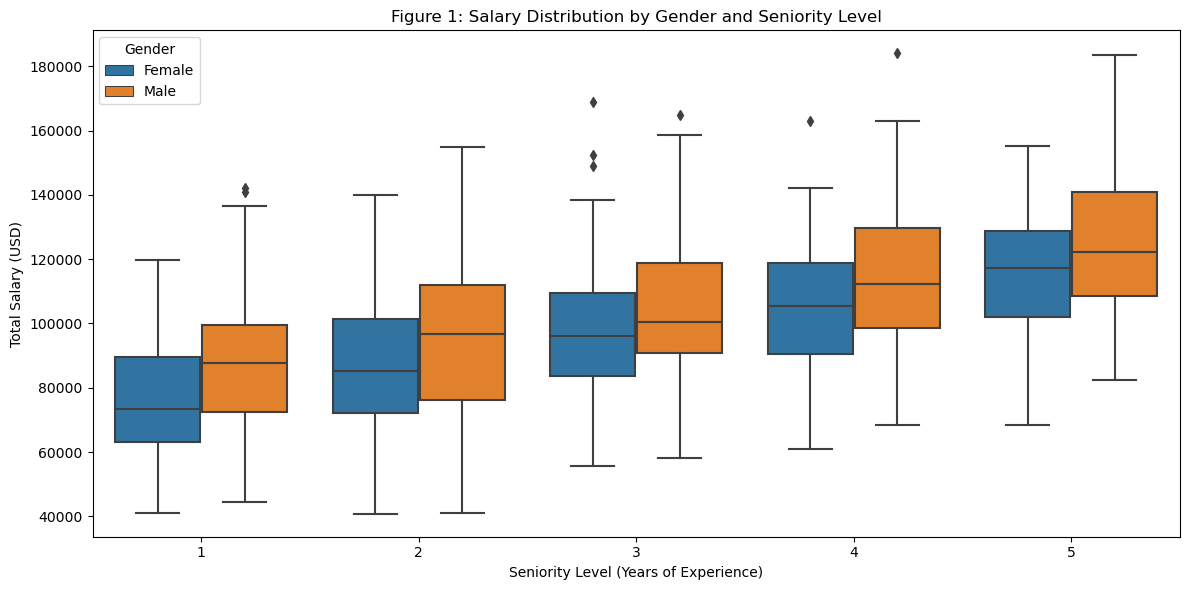

In [59]:
# Create a total salary column
df['salary'] = df['basepay'] + df['bonus']

# Convert gender and seniority to categorical
df['gender'] = df['gender'].astype('category')
df['seniority'] = df['seniority'].astype('category')

# --------------------------------------
# Figure 1: Boxplot of Salary by Gender and Seniority
# --------------------------------------

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='seniority', y='salary', hue='gender')
plt.title('Figure 1: Salary Distribution by Gender and Seniority Level')
plt.xlabel('Seniority Level (Years of Experience)')
plt.ylabel('Total Salary (USD)')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()





In [60]:
# --------------------------------------
# Two-Way ANOVA: Gender, Seniority, and Their Interaction
# --------------------------------------

model = ols('salary ~ C(gender) * C(seniority)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Two-Way ANOVA Table:\n")
print(anova_table)


Two-Way ANOVA Table:

                              sum_sq     df           F        PR(>F)
C(gender)               2.120452e+10    1.0   48.612809  5.691374e-12
C(seniority)            1.813187e+11    4.0  103.921404  6.356250e-74
C(gender):C(seniority)  1.076580e+09    4.0    0.617034  6.504556e-01
Residual                4.318300e+11  990.0         NaN           NaN


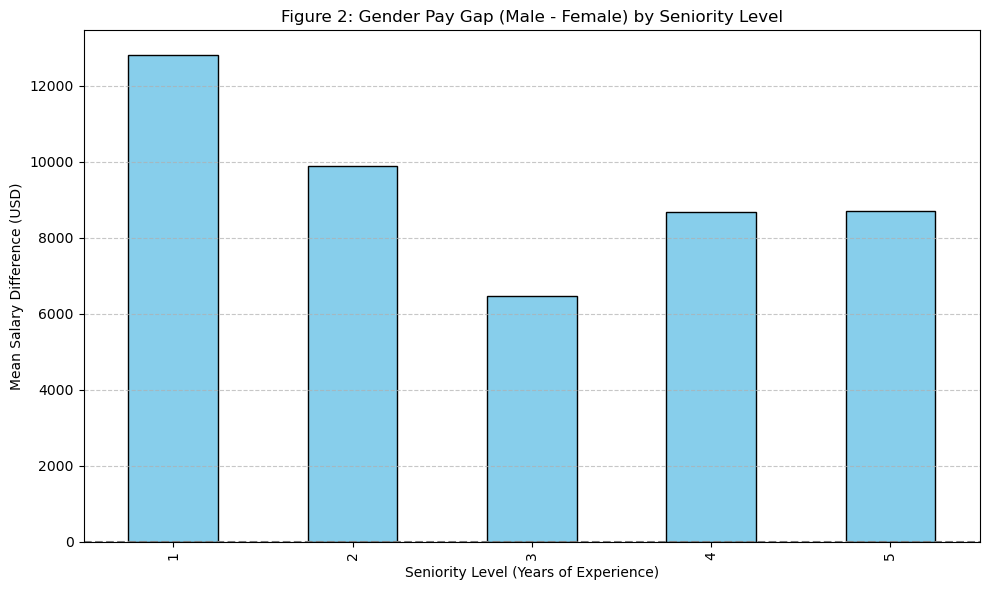

In [61]:
# --------------------------------------
# Figure 2: Bar Chart of Gender Pay Gap (Male - Female) by Seniority Level
# --------------------------------------

# Calculate mean salary by gender and seniority
mean_salary = df.groupby(['seniority', 'gender'])['salary'].mean().unstack()

# Ensure column names are standard strings
mean_salary.columns = mean_salary.columns.astype(str)

# Compute the gender pay gap
mean_salary['gap'] = mean_salary['Male'] - mean_salary['Female']

# Plot the gender pay gap
plt.figure(figsize=(10, 6))
mean_salary['gap'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Figure 2: Gender Pay Gap (Male - Female) by Seniority Level')
plt.xlabel('Seniority Level (Years of Experience)')
plt.ylabel('Mean Salary Difference (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
# --------------------------------------
# Posthoc Analysis: Tukey's HSD Test
# --------------------------------------

# Create a new group variable combining gender and seniority
df['group'] = df['gender'].astype(str) + "_" + df['seniority'].astype(str)

# Run Tukey's HSD test on salary by group
tukey = pairwise_tukeyhsd(endog=df['salary'], groups=df['group'], alpha=0.05)

print("\nTukey's HSD Posthoc Test Results:\n")
print(tukey)


Tukey's HSD Posthoc Test Results:

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1   group2    meandiff  p-adj     lower       upper    reject
-------------------------------------------------------------------
Female_1 Female_2  10163.3173 0.0345    373.4137  19953.2209   True
Female_1 Female_3  22222.7921  0.001  12516.1145  31929.4697   True
Female_1 Female_4  30533.5881  0.001  20157.3138  40909.8624   True
Female_1 Female_5   40704.496  0.001  30802.0377  50606.9543   True
Female_1   Male_1  12810.8827  0.001   3219.0647  22402.7008   True
Female_1   Male_2  20043.1553  0.001  10356.4174  29729.8932   True
Female_1   Male_3  28692.1816  0.001  19118.4455  38265.9177   True
Female_1   Male_4  39219.2179  0.001  29471.6387  48966.7971   True
Female_1   Male_5  49413.7027  0.001  39487.4909  59339.9145   True
Female_2 Female_3  12059.4748 0.0014   2873.8156  21245.1341   True
Female_2 Female_4  20370.2708  0.001  10479.6786  30260.8631   True
Female_2 Fem